In [1]:
from pycocotools.coco import COCO

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import json

import cv2

import seaborn as sns

In [2]:
data_path = '/opt/ml/dataset'
path = os.path.join(data_path, 'train.json')

In [3]:
with open(path, 'r') as f:
    dataset = json.load(f)

In [4]:
image_list = dataset['images']
ann_list = dataset['annotations']
cat_list = dataset['categories']

{'image_id': 0, 'category_id': 0, 'area': 257301.66, 'bbox': [197.6, 193.7, 547.8, 469.7], 'iscrowd': 0, 'id': 0}
{'image_id': 1, 'category_id': 3, 'area': 10402.56, 'bbox': [0.0, 407.4, 57.6, 180.6], 'iscrowd': 0, 'id': 1}
{'image_id': 1, 'category_id': 7, 'area': 26259.36, 'bbox': [0.0, 455.6, 144.6, 181.6], 'iscrowd': 0, 'id': 2}
{'image_id': 1, 'category_id': 4, 'area': 69096.17, 'bbox': [722.3, 313.4, 274.3, 251.9], 'iscrowd': 0, 'id': 3}
{'image_id': 1, 'category_id': 5, 'area': 24164.58, 'bbox': [353.2, 671.0, 233.7, 103.4], 'iscrowd': 0, 'id': 4}
{'image_id': 1, 'category_id': 5, 'area': 188324.4, 'bbox': [3.7, 448.5, 778.2, 242.0], 'iscrowd': 0, 'id': 5}
{'image_id': 1, 'category_id': 0, 'area': 38908.72, 'bbox': [425.3, 681.9, 216.4, 179.8], 'iscrowd': 0, 'id': 6}
{'image_id': 1, 'category_id': 7, 'area': 7391.52, 'bbox': [92.4, 601.7, 139.2, 53.1], 'iscrowd': 0, 'id': 7}
{'image_id': 1, 'category_id': 0, 'area': 6857.76, 'bbox': [622.4, 686.5, 72.8, 94.2], 'iscrowd': 0, 'id'

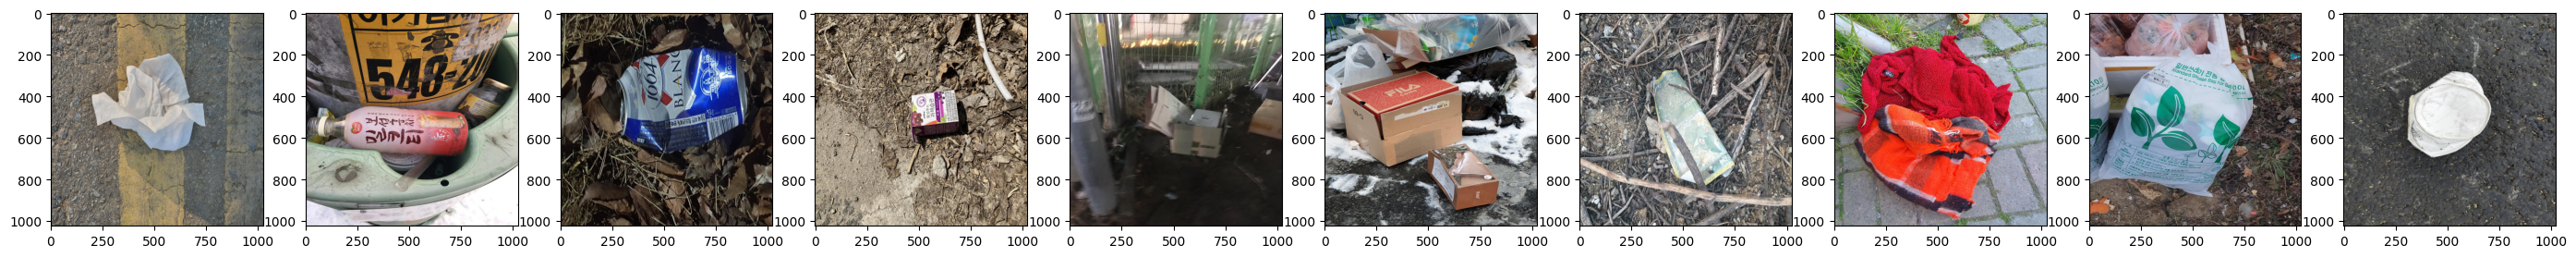

In [5]:
fig = plt.figure(figsize=(35, 20))

for i in range(10):
    image = cv2.imread('/opt/ml/dataset/'+ image_list[i]['file_name'])
    ax = fig.add_subplot(1, 10, i+1)
    ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    print(dataset['annotations'][i])
    
plt.show()

In [6]:
df_box = pd.DataFrame(ann_list)

In [7]:
class_name = [0] * 10
classes = ["General trash", "Paper", "Paper pack", "Metal", "Glass", 
           "Plastic", "Styrofoam", "Plastic bag", "Battery", "Clothing"]

for i in df_box.category_id:
    class_name[i] += 1

colors = sns.color_palette('hls',len(class_name))

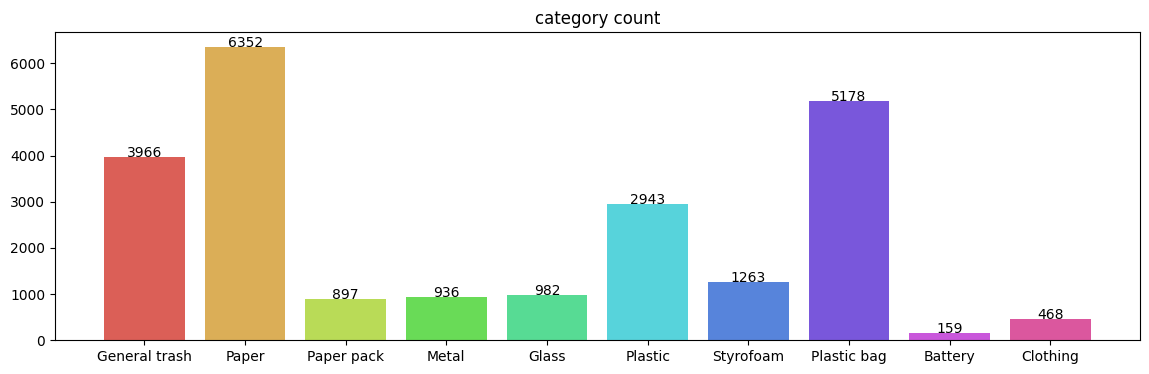

In [8]:
fig = plt.figure(figsize=(14, 4))
ax = fig.add_subplot()
plt.title('category count')
bars = plt.bar(classes, class_name, color=colors)

for i, b in enumerate(bars):
    ax.text(b.get_x() + b.get_width() * (1/2), b.get_height() + 0.1, class_name[i], ha='center')

plt.show()

class별 imbalance 문제가 있을것이다? battery 항목은 매우 작고, clothing 항목도 작아보임

In [9]:
group_box = df_box.groupby('image_id')
box_lst = [0] * 5

In [270]:
len(group_box.size().value_counts().sort_index())

47

In [14]:
for num in group_box.size():
    if num == 1:
        box_lst[0] += 1
    elif num <= 5:
        box_lst[1] += 1
    elif num <= 10:
        box_lst[2] += 1
    elif num < 40:
        box_lst[3] += 1
    else:
        box_lst[4] += 1

1개 검출되는것이 제일 많고 많게는 71개까지 있어서 47개를 5개로 그룹화 시켜봄 

In [15]:
label = ['1', '5', '10', '40', 'other']
colors = sns.color_palette('hls',len(box_lst))

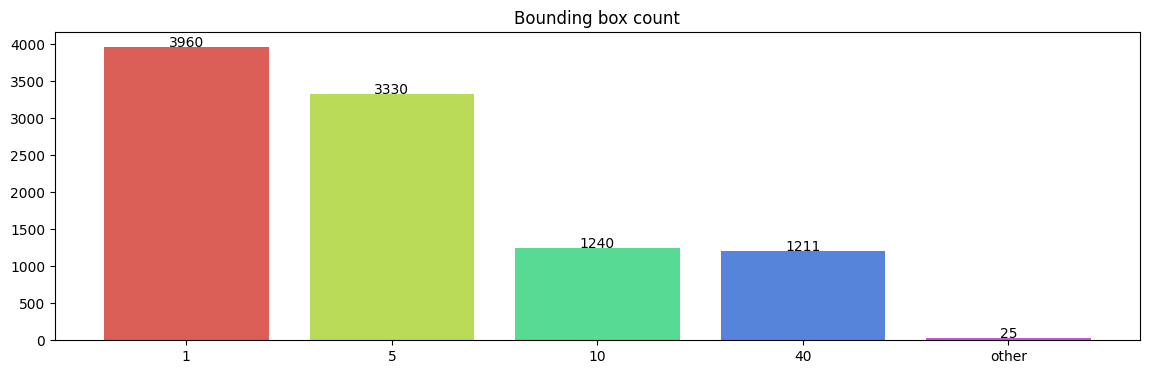

In [16]:
fig = plt.figure(figsize=(14, 4))
ax = fig.add_subplot()
plt.title('Bounding box count')
bars = plt.bar(label, box_lst, color=colors)

for i, b in enumerate(bars):
    ax.text(b.get_x() + b.get_width() * (1/2), b.get_height() + 0.1, box_lst[i], ha='center')

plt.show()

In [18]:
group_box = df_box.groupby('image_id').count()
many_box = group_box[group_box.category_id >= 40].index.to_list()
many_box

[394,
 946,
 1678,
 1797,
 1955,
 2416,
 2521,
 2981,
 3825,
 4047,
 4197,
 4492,
 4778,
 4841]

In [17]:
df_box.bbox

0        [197.6, 193.7, 547.8, 469.7]
1           [0.0, 407.4, 57.6, 180.6]
2          [0.0, 455.6, 144.6, 181.6]
3        [722.3, 313.4, 274.3, 251.9]
4        [353.2, 671.0, 233.7, 103.4]
                     ...             
23139      [0.0, 116.2, 944.1, 814.1]
23140    [302.1, 439.3, 265.2, 216.1]
23141      [511.3, 451.1, 58.7, 30.2]
23142    [255.0, 421.4, 271.7, 195.1]
23143    [145.4, 295.4, 420.2, 356.1]
Name: bbox, Length: 23144, dtype: object

In [18]:
df_images = pd.DataFrame(image_list)

In [19]:
group_box = df_box.groupby('image_id')
groupby_box = {idx: group for idx, group in group_box}

In [20]:
cat_list

[{'id': 0, 'name': 'General trash', 'supercategory': 'General trash'},
 {'id': 1, 'name': 'Paper', 'supercategory': 'Paper'},
 {'id': 2, 'name': 'Paper pack', 'supercategory': 'Paper pack'},
 {'id': 3, 'name': 'Metal', 'supercategory': 'Metal'},
 {'id': 4, 'name': 'Glass', 'supercategory': 'Glass'},
 {'id': 5, 'name': 'Plastic', 'supercategory': 'Plastic'},
 {'id': 6, 'name': 'Styrofoam', 'supercategory': 'Styrofoam'},
 {'id': 7, 'name': 'Plastic bag', 'supercategory': 'Plastic bag'},
 {'id': 8, 'name': 'Battery', 'supercategory': 'Battery'},
 {'id': 9, 'name': 'Clothing', 'supercategory': 'Clothing'}]

In [ ]:
classes = ["General trash", "Paper", "Paper pack", "Metal", "Glass", 
           "Plastic", "Styrofoam", "Plastic bag", "Battery", "Clothing"]

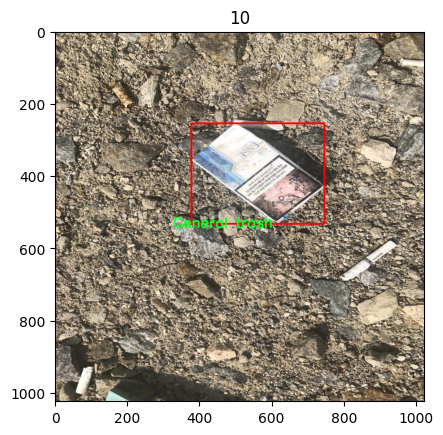

In [256]:
idx = 10
image = cv2.imread('/opt/ml/dataset/'+ image_list[idx]['file_name'])

# print(image)
for box, cat_id in zip(groupby_box[idx].bbox, groupby_box[idx].category_id):
    x, y, w, h = map(int, box)
    image = cv2.rectangle(image, (x, y), (x+w, y+h), (0, 0, 255), 3)
    cv2.putText(image, cat_list[cat_id]['name'], (x-50, y+h+10), cv2.FONT_HERSHEY_SIMPLEX, 1.3, (36,255,12), 4)

plt.plot()
plt.title(idx)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [20]:
ann_df = pd.DataFrame(ann_list)

In [27]:
ann_df.area.describe()

count    2.314400e+04
mean     9.286396e+04
std      1.359791e+05
min      5.600000e-01
25%      9.997670e+03
50%      3.893847e+04
75%      1.191225e+05
max      1.048371e+06
Name: area, dtype: float64

In [81]:
all_lst, small_lst, mid_lst, big_lst = [], [], [], []

In [82]:
for i in range(len(ann_df)):
    # print(ann_df.iloc[i]['area'])
    area = float(ann_df.iloc[i]['area'])
    all_lst.append(area)

    if area < 32*32:
        small_lst.append(area)
    elif area < 96*96:
        mid_lst.append(area)
    else:
        big_lst.append(area)


In [83]:
label = ['small', 'mid', 'large']
colors = sns.color_palette('hls',len(label))
area_lst = [len(small_lst), len(mid_lst), len(big_lst)]

https://cocodataset.org/#detection-eval

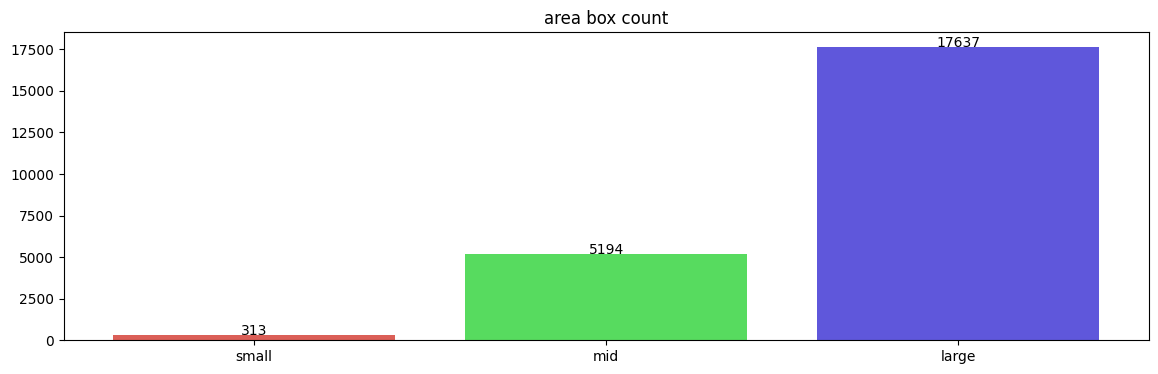

In [84]:
fig = plt.figure(figsize=(14, 4))
ax = fig.add_subplot()
plt.title('area box count')
bars = plt.bar(label, area_lst, color=colors)

for i, b in enumerate(bars):
    ax.text(b.get_x() + b.get_width() * (1/2), b.get_height() + 0.1, area_lst[i], ha='center')

plt.show()

면적을 describe 통해 개수 확인

In [76]:
df = pd.DataFrame()

image_ids = []
class_name = []
class_id = []
x = []
y = []
w = []
h = []
classes = ["General trash", "Paper", "Paper pack", "Metal", "Glass", 
           "Plastic", "Styrofoam", "Plastic bag", "Battery", "Clothing"]

for ann in ann_list:
    image_ids.append(ann['image_id'])
    class_name.append(classes[ann['category_id']])
    class_id.append(ann['category_id'])
    x.append(float(ann['bbox'][0]))
    y.append(float(ann['bbox'][1]))
    w.append(float(ann['bbox'][2]))
    h.append(float(ann['bbox'][3]))

df['image_id'] = image_ids
df['class_name'] = class_name
df['class_id'] = class_id
df['x'] = x
df['y'] = y
df['w'] = w
df['h'] = h

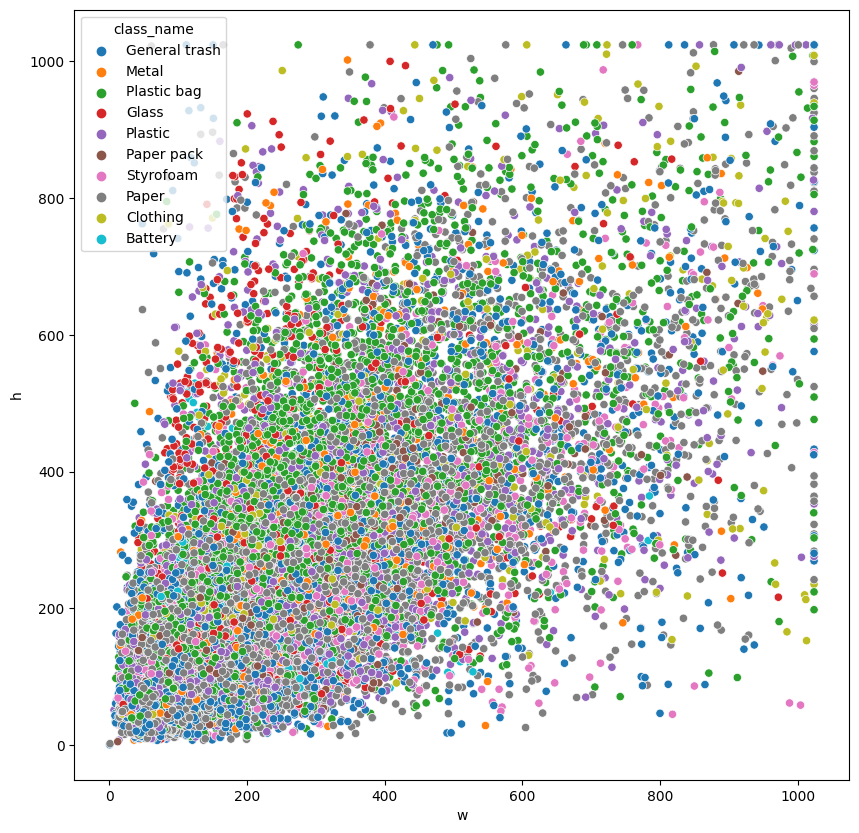

In [80]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(x='w', y='h', data=df, hue='class_name')
plt.show()